In [8]:
#import necessary librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [9]:
data = pd.read_csv("medquad.csv")
print(data.shape)
data.head()

(16412, 4)


,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [10]:
len(data["answer"].unique())

15818

### Exploratory data analysis

#### Analyse univariée

In [11]:
train_data, test_data = train_test_split(data,test_size=0.2, random_state = 42)

print(f"Taille du train {len(train_data)}")
print(f"Taille du test {len(test_data)}")


Taille du train 13129
Taille du test 3283


In [12]:
print(f"Le type de chaque colonne : \n  {train_data.dtypes}")
print(f"Y a-t-il des NaN ?\n {train_data.isna().sum()}")

Le type de chaque colonne : 
  question      object
answer        object
source        object
focus_area    object
dtype: object
Y a-t-il des NaN ?
 question      0
answer        5
source        0
focus_area    9
dtype: int64


In [13]:
# Nous allons supprimer les NaN vu qu'il y en a pas beaucoup

train_data = train_data.dropna(axis=0)

In [14]:
train_data

,question,answer,source,focus_area
9657,what research (or clinical trials) is being do...,The NINDS supports research on genetic disorde...,NINDS,Cerebro-Oculo-Facio-Skeletal Syndrome (COFS)
3251,What are the symptoms of Mantle cell lymphoma ?,What are the signs and symptoms of Mantle cell...,GARD,Mantle cell lymphoma
396,What is (are) Breast Cancer ?,A mammogram can often detect breast changes in...,NIHSeniorHealth,Breast Cancer
8250,Who is at risk for Heart Attack? ?,Certain risk factors make it more likely that ...,NHLBI,Heart Attack
6818,How to diagnose Glucose transporter type 1 def...,How is glucose transporter type 1 deficiency s...,GARD,Glucose transporter type 1 deficiency syndrome
...,...,...,...,...
11284,What are the treatments for Langer mesomelic d...,These resources address the diagnosis or manag...,GHR,Langer mesomelic dysplasia
11964,What are the treatments for hereditary xanthin...,These resources address the diagnosis or manag...,GHR,hereditary xanthinuria
5390,What are the symptoms of Hallermann-Streiff sy...,What are the signs and symptoms of Hallermann-...,GARD,Hallermann-Streiff syndrome
860,Who is at risk for Uterine Sarcoma? ?,Being exposed to x-rays can increase the risk ...,CancerGov,Uterine Sarcoma


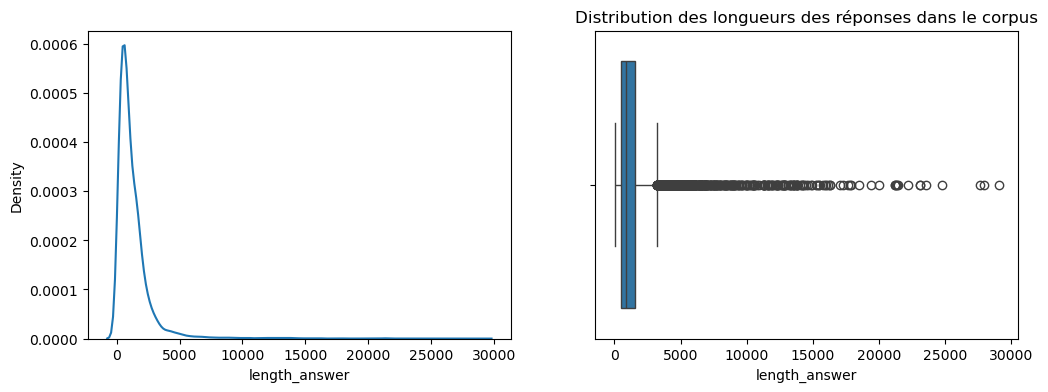

In [21]:
# Etude de la longueur des reponses 
train_data["length_answer"] = train_data["answer"].apply(lambda x : len(x) )
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data,x="length_answer")
plt.subplot(1,2,2)
sns.boxplot(data=train_data,x="length_answer")
plt.title("Distribution des longueurs des réponses dans le corpus",loc="center")
plt.show()

La distribution des longueurs des réponses est fortement asymétrique à droite.

La courbe de densité présente un pic en 0, ce qui montre que de nombreuses réponses sont très courtes.

La distribution possède une queue extrêmement longue au-delà de 5000 caractères.
Ces valeurs ne sont pas forcément aberrantes : dans un corpus textuel, des réponses très longues peuvent être structurellement normales.

Le boxplot est fortement compressé entre 0 et 5000, ce qui reflète l'effet de cette asymétrie : la majorité des réponses ont une longueur relativement modeste mais quelques observations très longues tirent la distribution vers la droite.

La présence d’un grand nombre de valeurs extrêmes nuit à la visualisation en échelle linéaire.

(0.0, 2000.0)

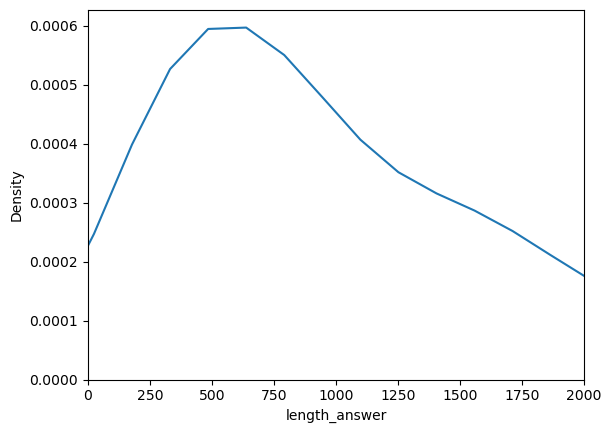

In [18]:
sns.kdeplot(data=train_data, x="length_answer")
plt.xlim(0, 2000)


### Preprocessing